<a href="https://colab.research.google.com/github/teshenglin/Intro_machine_mearning/blob/main/Calculus_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus using Python

* Reference: 政治大學應用數學系 - 蔡炎龍教授: [使用 sympy 和微積分的各種玩耍.ipynb](https://colab.research.google.com/github/yenlung/Math-in-Jupyter/blob/master/%E4%BD%BF%E7%94%A8sympy%E5%92%8C%E5%BE%AE%E7%A9%8D%E5%88%86%E7%9A%84%E5%90%84%E7%A8%AE%E7%8E%A9%E8%80%8D.ipynb)

## Package loading

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

## Simple examples on symbolic calculation

In [ ]:
1/2 + 1/3

0.8333333333333333

In [ ]:
from sympy import S

In [ ]:
S(1)/2 + S(1)/3

5/6

In [ ]:
S(1/2) + S(1/3)

0.833333333333333

## function

### Define variables

#### Single variable

To define x as a variable

In [ ]:
x = sp.Symbol('x')
x**2

x**2

#### Multiple variables

To define x, y, z as variables

In [ ]:
x, y, z = sp.symbols('x,y,z')
x**2 + y*x + z**1.5

x**2 + x*y + z**1.5

#### abc module

> This module exports all latin and greek letters as Symbols, so you can conveniently do

In [ ]:
from sympy.abc import x, y, z, t, a, b, c, alpha, beta, gamma

In [ ]:
a*x + b*y + c*z + gamma*x**2

a*x + b*y + c*z + gamma*x**2

In [ ]:
f = x**2
f

x**2

### Evaluate

Use `sub` to evaluate the function at a given value.

For example, to evaluate $f(87)$:

In [ ]:
f.subs(x, 87)

7569

Similarly, for functions with multiple variables:

In [ ]:
g = x*y + 1
g.subs([(x, 94), (y, 87)])

8179

### Graph

To graph a function:

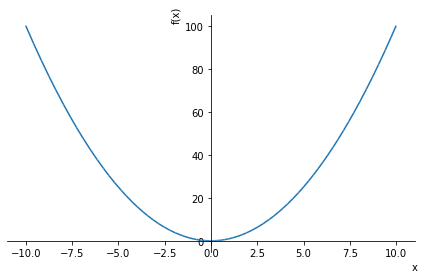

In [ ]:
sp.plot(f)

To graph a function with specific range:

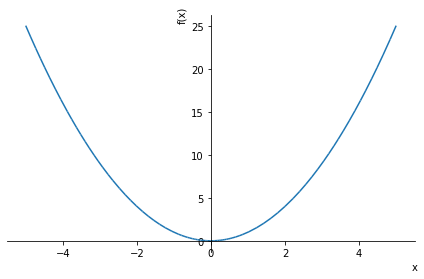

In [ ]:
sp.plot(f, (x, -5, 5))

Multiple graph:

In [ ]:
from sympy.plotting import PlotGrid

In [ ]:
p1 = sp.plot(x**2,  show=False)
p2 = sp.plot(sp.exp(x), show=False)
p3 = sp.plot(sp.log(x), show=False)
p4 = sp.plot(sp.sin(x), show=False)

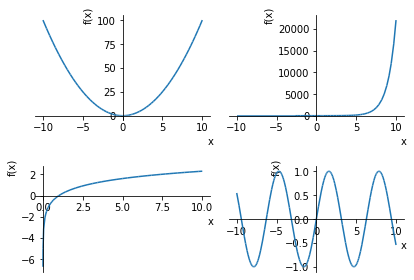

In [ ]:
PlotGrid(2, 2, p1, p2, p3, p4)

### Limit

In [ ]:
f = sp.sin(x)/x
f

sin(x)/x

In [ ]:
sp.limit(f, x, 0)

1

#### One side limit

In [ ]:
g = 1/x
g

1/x

In [ ]:
sp.limit(g, x, 0, '+')

oo

In [ ]:
sp.limit(g, x, 0, '-')

-oo

#### Limit at infinity

In [ ]:
h = 1/(1+sp.exp(-x))
h

1/(1 + exp(-x))

In [ ]:
sp.limit(h, x, sp.oo)

1

In [ ]:
sp.limit(h, x, -sp.oo)

0

### Derivative

In [ ]:
f = x**4 - 3*x**2 + 2*x - 5
f

x**4 - 3*x**2 + 2*x - 5

#### First derivative

In [ ]:
sp.diff(f, x)

4*x**3 - 6*x + 2

#### Second derivative

In [ ]:
sp.diff(f, x, 2)

6*(2*x**2 - 1)

#### More examples

In [ ]:
sp.diff(sp.sin(x), x, 1)

cos(x)

Derivative of $\sin^{-1}(x)$

In [ ]:
sp.diff(sp.asin(x), x, 1)

1/sqrt(1 - x**2)

#### Implicit differentiation

Suppose we have the relation $f(x, y)=0$ and we aim to find $\frac{\partial y}{\partial x}$.

Firstly, we need to define $f(x, y)$:

In [ ]:
f = y**2 - x
f

-x + y**2

The we take derivative of $y$ with repspect to $x$:
> Note that for implicit differentiation, we use `sp.idiff`

In [ ]:
sp.idiff(f, y, x)

1/(2*y)

To find the slope of this curve at, say, $(x,y)=(1,1)$:

In [ ]:
sp.idiff(f, y, x).subs([(x,1), (y,1)])

1/2

#### Graph of a implicit function

To make a graph of a curve defined by $f(x, y)=a$:

Firstly, we need to define this equation as `sp.Eq(f, a)`. \\
Then we use `sp.plot_implicit` to make a graph.

In [ ]:
f

-x + y**2

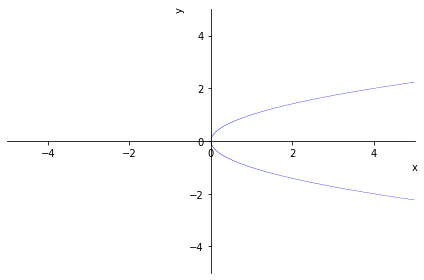

In [ ]:
sp.plot_implicit(sp.Eq(f, 0))

#### Critical points

1. To look for the points at which the derivative equals to zero.

In [ ]:
f = x**3 + 2*x**2 + x
f

x**3 + 2*x**2 + x

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
sp.solveset(f1, x, domain=S.Reals)

FiniteSet(-1, -1/3)

1.1 To check the concavity at the critical points.
> Evalaute the second derivative at these points.

In [ ]:
f2 = sp.diff(f, x, 2)

In [ ]:
f2.subs(x, -1)

-2

In [ ]:
f2.subs(x, -S(1)/3)

2

2. To look for singular points.

In [ ]:
from sympy.calculus import singularities

In [ ]:
f = 1/x
f

1/x

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
singularities(f1, x)

FiniteSet(0)

In [ ]:
g = sp.Abs(x)
g

Abs(x)

In [ ]:
g1 = sp.diff(g, x)

In [ ]:
singularities(g1, x)

FiniteSet(0)

### Integration

#### Indefinite integral

In [ ]:
f = sp.sqrt(31*x + 2)
f

sqrt(31*x + 2)

In [ ]:
sp.integrate(f, x)

2*(31*x + 2)**(3/2)/93

#### Definite integral

In [ ]:
sp.integrate(f, (x,0,2))

1024/93 - 4*sqrt(2)/93

Or, to find a general formula for $\int^b_a f(x)\,dx$:

In [ ]:
sp.integrate(f, (x,a,b))

-2*(31*a + 2)**(3/2)/93 + 2*(31*b + 2)**(3/2)/93

#### Example

Consider the sigmoidal function $\sigma(x) = \frac{1}{1 + e^{-x}}$. \\
We know that $\sigma'(x) = \sigma(x)\sigma(-x)$. \\
Let's check if `sympy` is correct about it.

In [ ]:
f = 1/(1 + sp.exp(-x))
f

1/(1 + exp(-x))

In [ ]:
f1 = sp.diff(f, x)
f1

exp(-x)/(1 + exp(-x))**2

In [ ]:
g = 1/(1 + sp.exp(x))

In [ ]:
f1 - f*g

-1/((1 + exp(-x))*(exp(x) + 1)) + exp(-x)/(1 + exp(-x))**2

It should be zero but doesn't looks like. Use `sp.simplify` to symplify a bit:

In [ ]:
sp.simplify(f1 - f*g)

0